### Preparación del Entorno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.under_sampling import RandomUnderSampler #Undersampling biblioteca de procesamiento RandomUnderSampler
import modulosP2

### Carga del Dataset

In [2]:
data = pd.read_csv('DataProyecto.csv', sep = ",", encoding='latin-1')
dataset = data

In [3]:
dataset

,Tipo_Contrato,Pais,Movimiento_Ventas,Transaccion_Ventas,Fecha_Emision,Cliente,Nombre,Sub_Contrato,Proyecto,Grupo,...,Vehiculo,Placas,Modelo,Chasis,Motor,Lineas,Fabricante,Tracker_Clase,Trackertipo,Color
0,Renta,GT,Instalacion Renta,EUR25258,10-01-2022,GTC-085342,"CORAVI, SOCIEDAD ANONIMA",EUR20803-1,Particular,Particulares,...,GTV-180461,C269BVX,1997,2FUPDSEB4VA5752752,06R02936706067GK60,FLD120 D132064T,FreightLiner,CABEZAL,CABEZAL,Rojo Policromado
1,Renta,GT,Instalacion Renta,EUR25235,10-01-2022,GTC-086916,MF TRANSPORTES,EUR20804-1,Particular,Particulares,...,GTV-180372,C691BPD,2000,YC060717,06R05303366067MK60,9400 EAGLE 6 X 4,International,CABEZAL,CABEZAL,BLANCO CON FRANJAS AZUL Y NEGRAS
2,Renta,GT,Instalacion Renta,EUR25238,10-01-2022,GTC-000014,"SEGUROS G&T, S.A.",EUR20805-6,Particular,Aseguradoras,...,GTV-120455,P439DKS,2008,JTDBT933081225552,1NZ4840599,Yaris,Toyota,AUTOMOVIL,AUTOMOVIL,OLIVO METALICO
3,Renta,GT,Instalacion Renta,EUR25242,10-01-2022,GTC-000014,"SEGUROS G&T, S.A.",EUR20805-11,Particular,Particulares,...,GTV-180490,C527BKT,2008,JHFAF03H689000862,W04DJ25487,WU300L-HBMMS3,Hino,CAMION,CAMION,Gris Claro
4,Renta,GT,Instalacion Renta,EUR25256,10-01-2022,GTC-006218,"CARRO FACIL, S.A.",VLL5718-17,Comodato,Financieras,...,GTV-180501,S317178,2022,8AJDB3CD8N1317178,2GD1055567,Hilux,Toyota,PICK UP,PICK UP,Super Blanco II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Venta,HN,Instalacion,PO43746,9-03-2022,HNC-000001,CORPORACION FLORES S.A.,BDE62-52,Particular,Concesionarios,...,HNV-084113,S731690,2022,MROKB3CC600731690,2GD1128101,Hilux,TOYOTA,AUTOMOVIL,Pick Up,ROJO EMOCIONAL
2330,Venta,HN,Instalacion,PO43747,9-03-2022,HNC-000001,CORPORACION FLORES S.A.,BDE62-53,Particular,Concesionarios,...,HNV-084112,S511911,2022,8AJDB8CB70551911,S511911,Hilux,TOYOTA,AUTOMOVIL,Pick Up,Rojo
2331,Venta,HN,Instalacion,PO43750,9-03-2022,HNC-000001,CORPORACION FLORES S.A.,BDE62-57,Particular,Concesionarios,...,HNV-083904,S731682,2022,MR0KB3CC700731682,2GD1125402,Hilux,TOYOTA,PICK UP,Pick Up,ROJO EMOCIONAL
2332,Venta,HN,Instalacion,PO43751,9-03-2022,HNC-000001,CORPORACION FLORES S.A.,BDE62-58,Particular,Concesionarios,...,HNV-084046,S243820,2022,JTEBR3FJ10K243820,1GD8873156,Prado,TOYOTA,AUTOMOVIL,Camioneta,Azul Verdoso


### Nombre de las columnas

In [4]:
dataset.columns

Index(['Tipo_Contrato', 'Pais', 'Movimiento_Ventas', 'Transaccion_Ventas',
       'Fecha_Emision', 'Cliente', 'Nombre', 'Sub_Contrato', 'Proyecto',
       'Grupo', 'Familia', 'Tipo_Periodo', 'Frecuencia', 'Almacen_CT',
       'Almacen_Recurrente', 'Moneda', 'Tipo_Cambio', 'Articulo',
       'Descripcion_Plan', 'Equipo', 'Serie', 'Usuario', 'Agente', 'Cantidad',
       'Precio', 'Precio_Total', 'Descuento_Lineal', 'Importe', 'Impuestos',
       'Vehiculo', 'Placas', 'Modelo', 'Chasis', 'Motor', 'Lineas',
       'Fabricante', 'Tracker_Clase', 'Trackertipo', 'Color'],
      dtype='object')

### Balanceo Data de la Variable a Predecir

Se visualiza que los datos de la variable dependiente se encuentran en un equilibrio considerable tal y como está el dataset original por lo que no aplicará un balanceo.

In [5]:
dataset['Tipo_Contrato'].value_counts()

Venta    1306
Renta    1028
Name: Tipo_Contrato, dtype: int64

### Revisión datos de la Variables Independientes

In [6]:
dataset['Cantidad'].value_counts()

1    2334
Name: Cantidad, dtype: int64

In [7]:
dataset['Precio'].value_counts()

0.0    14
Name: Precio, dtype: int64

In [8]:
dataset['Descuento_Lineal'].value_counts()

0.00      1648
25.00       79
88.39       45
22.32       34
23.21       25
          ... 
168.75       1
19.99        1
26.40        1
86.83        1
156.25       1
Name: Descuento_Lineal, Length: 135, dtype: int64

In [9]:
dataset['Tracker_Clase'].value_counts()

Automovil                423
AUTOMOVIL                377
PICK UP                  362
CAMION                   327
CAMIONETA                152
CABEZAL                  118
Celular                   95
CELULAR                   69
MOTO                      56
Motocicleta               45
PANEL                     43
Camioneta                 33
PORTATIL                  29
TURISMO                   29
MOTOCICLETA               26
Camión                    24
MICROBUS                  24
MAQUINARIA AMARILLA       19
CAMION CISTERNA            9
Cabezal                    8
PORTA CONTENEDOR           7
Pick Up                    7
PLATAFORMA                 6
MAQUINARIA PESADA          5
FURGONETA                  5
FURGON                     5
BUS                        5
Automezcladora             4
OTROS                      4
Bus Pequeño                3
Vagoneta                   3
Autobus                    3
MAQUINARIA INDUSTRIAL      2
Furgon                     2
Maquinaria Ama

In [10]:
dataset.loc[:, ['Almacen_CT', 'Almacen_Recurrente']]

,Almacen_CT,Almacen_Recurrente
0,GTB-403,GTB-403
1,GTB-403,GTB-403
2,GTB-403,GTB-403
3,GTB-403,GTB-403
4,GTB-403,GTB-403
...,...,...
2329,HNB-309,HNB-309
2330,HNB-309,HNB-309
2331,HNB-309,HNB-309
2332,HNB-309,HNB-309


### Descarte de Columnas no útilies 

In [11]:
dataset = dataset.drop(['Precio', 'Cantidad', 'Almacen_Recurrente', 'Fecha_Emision', 'Vehiculo', 'Cliente'], axis=1)

### Clasificación de Columnas

In [12]:
dataset.dtypes

Tipo_Contrato          object
Pais                   object
Movimiento_Ventas      object
Transaccion_Ventas     object
Nombre                 object
Sub_Contrato           object
Proyecto               object
Grupo                  object
Familia                object
Tipo_Periodo           object
Frecuencia             object
Almacen_CT             object
Moneda                 object
Tipo_Cambio           float64
Articulo               object
Descripcion_Plan       object
Equipo                 object
Serie                   int64
Usuario                object
Agente                 object
Precio_Total          float64
Descuento_Lineal      float64
Importe               float64
Impuestos             float64
Placas                 object
Modelo                  int64
Chasis                 object
Motor                  object
Lineas                 object
Fabricante             object
Tracker_Clase          object
Trackertipo            object
Color                  object
dtype: obj

#### Obtener el tipo de datos de las columnas del dataframe

In [13]:
categoric_vars, discrete_vars , continues_vars = modulosP2.getColumnsDataTypes(df=dataset)

#### Análisis de datos categóricos

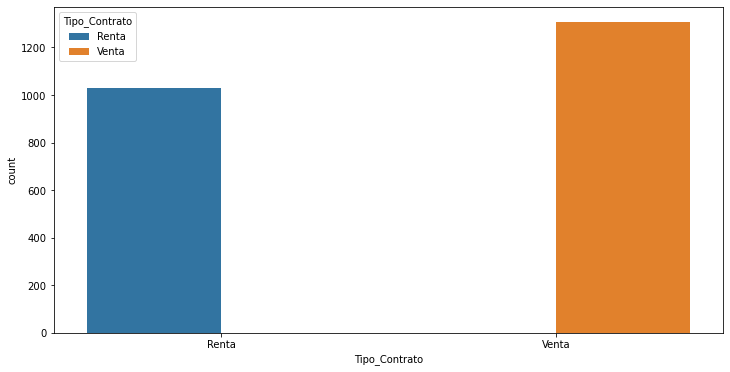

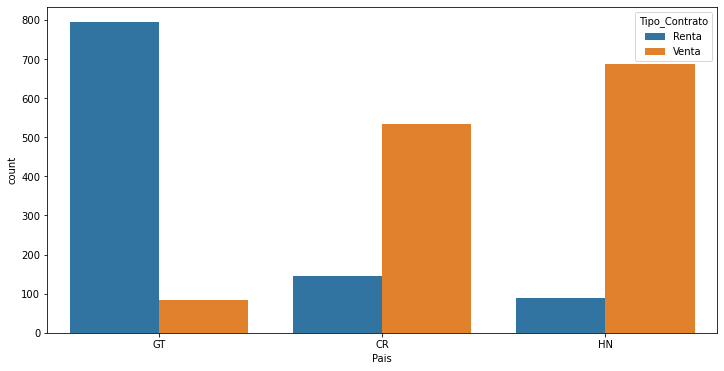

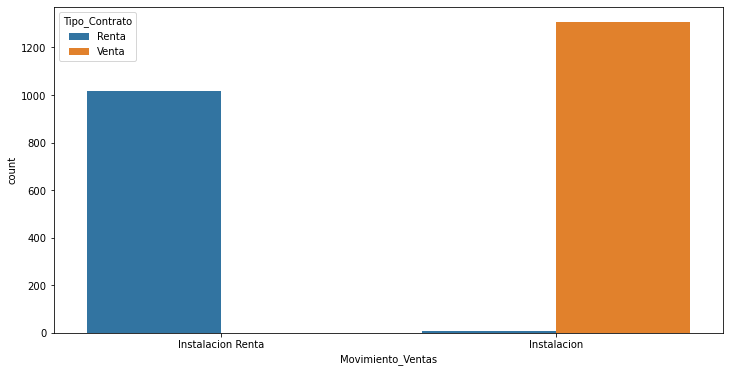

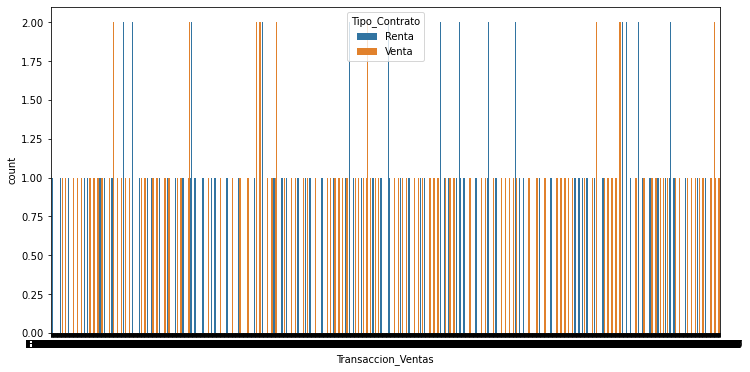

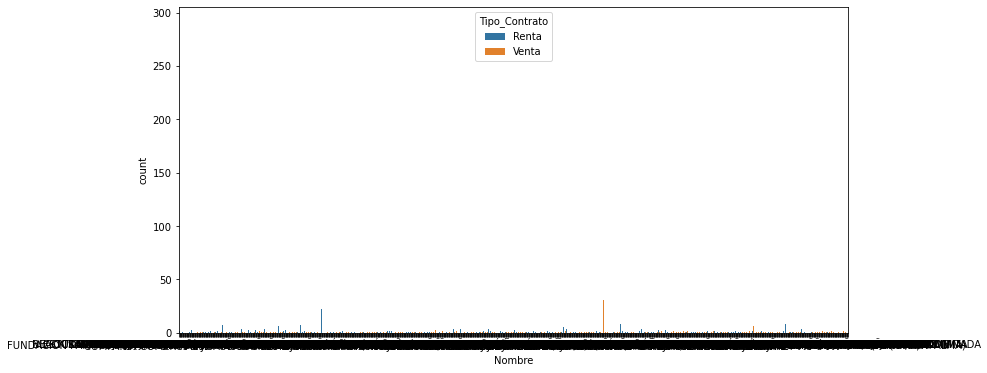

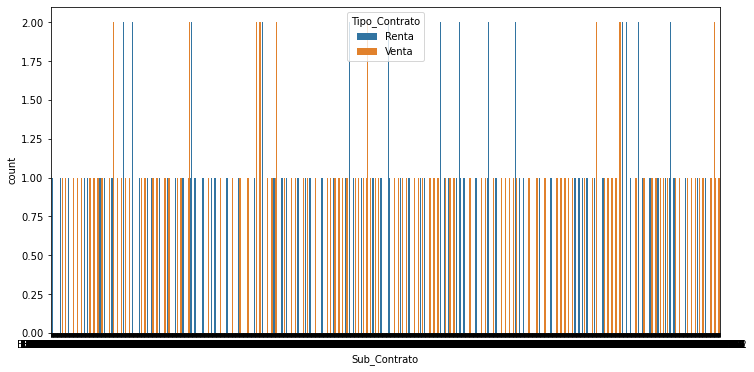

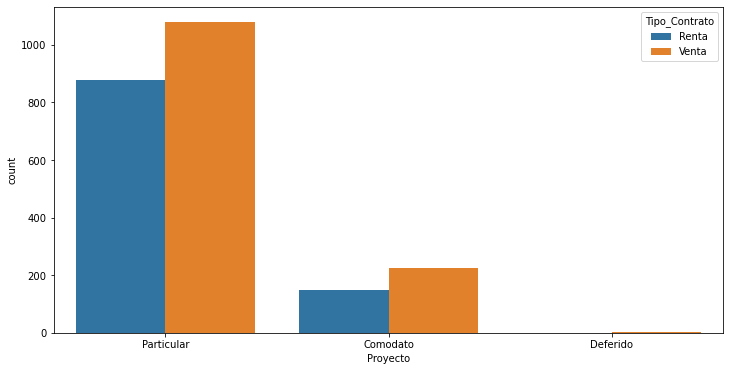

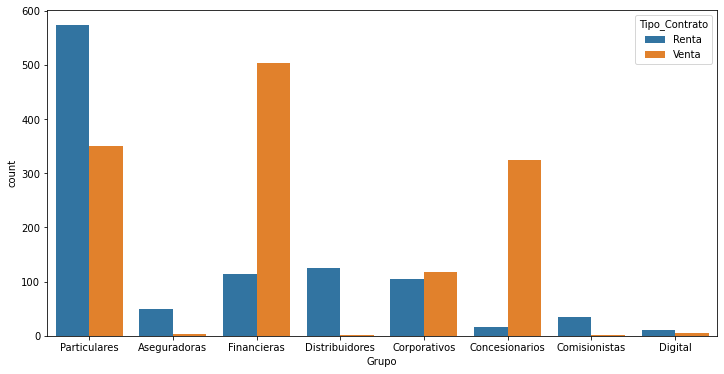

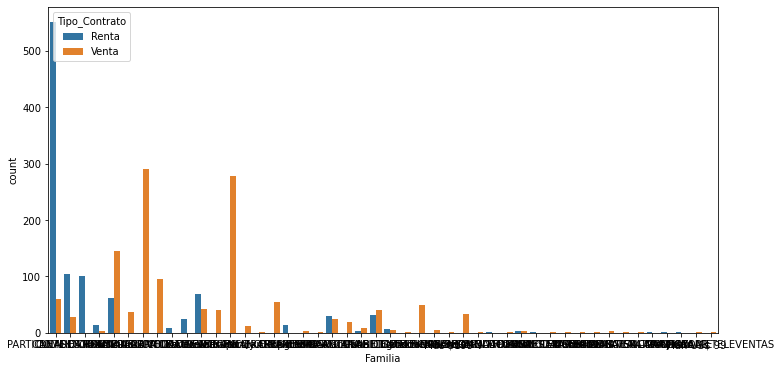

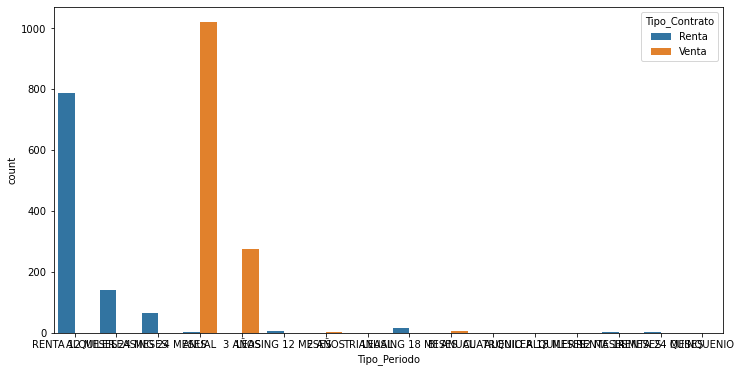

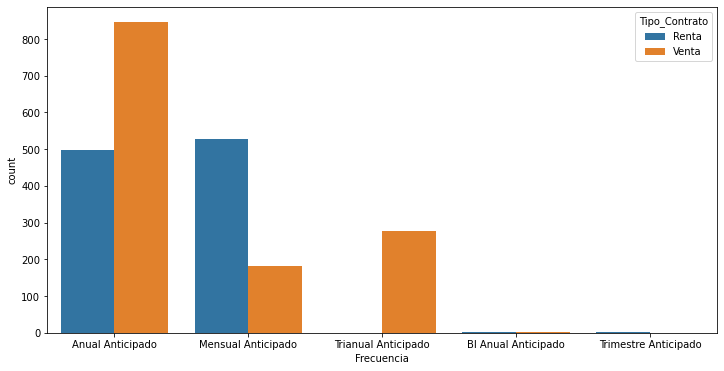

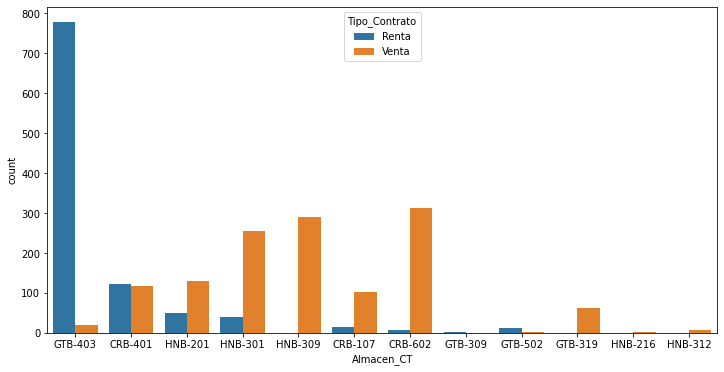

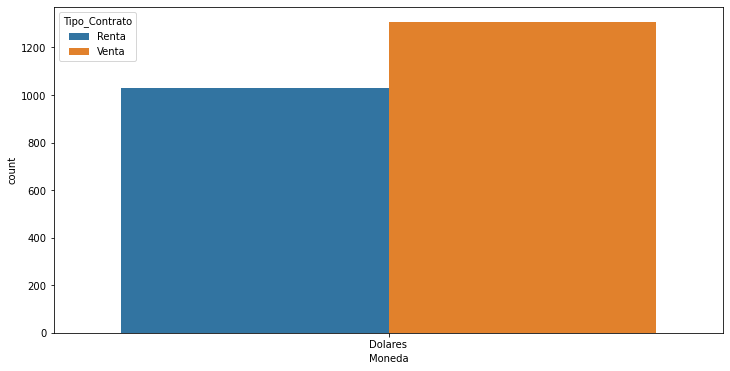

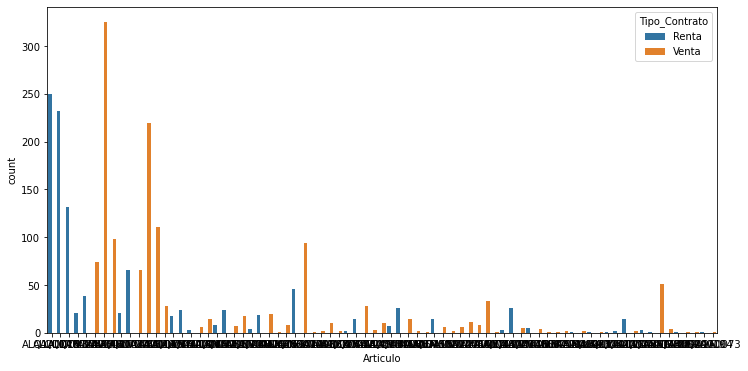

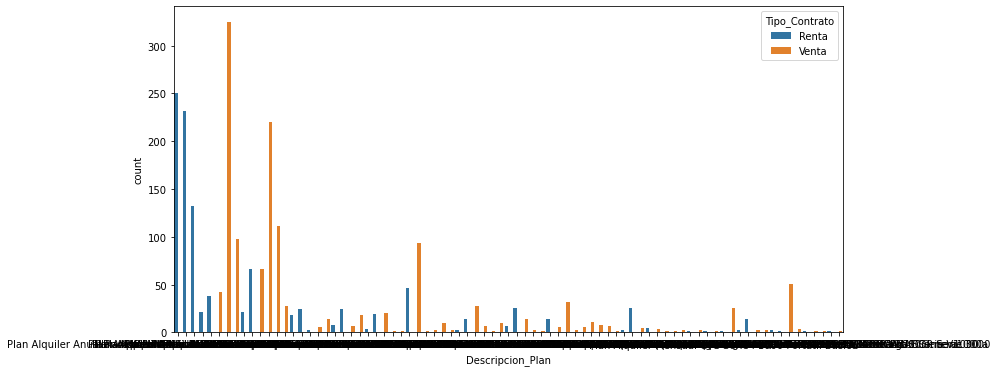

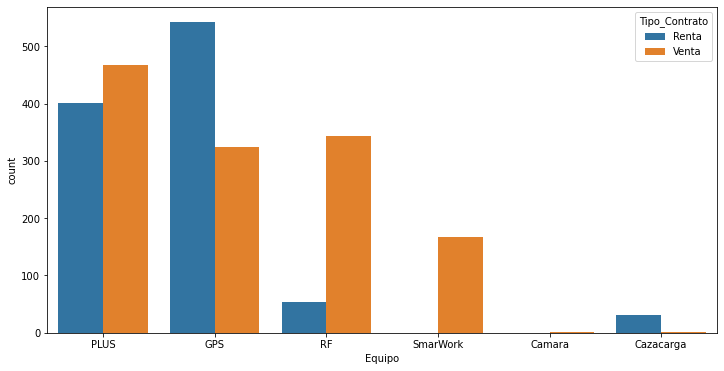

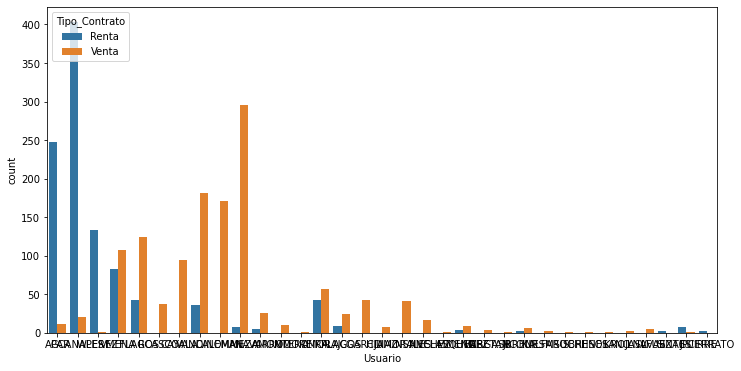

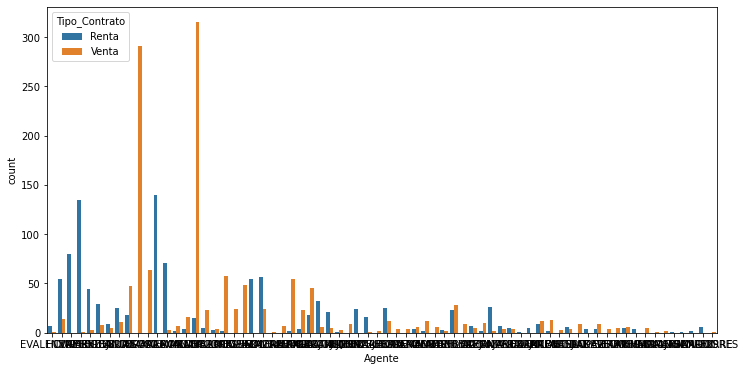

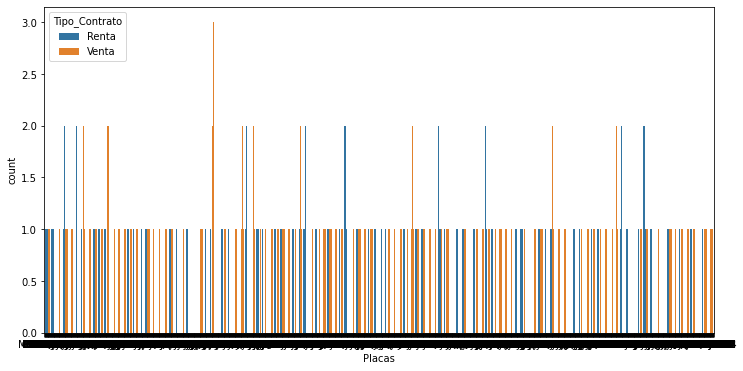

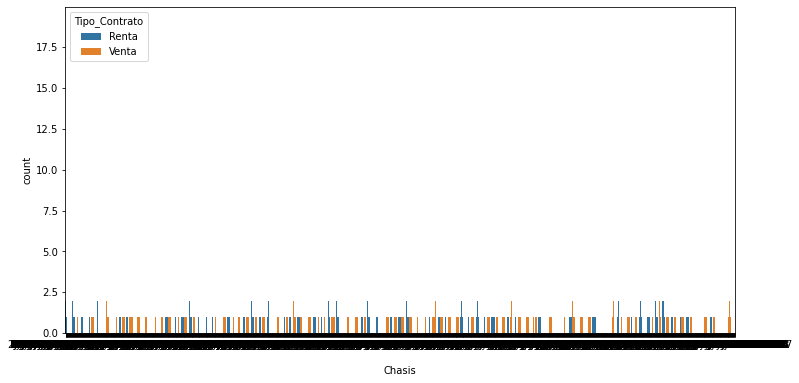

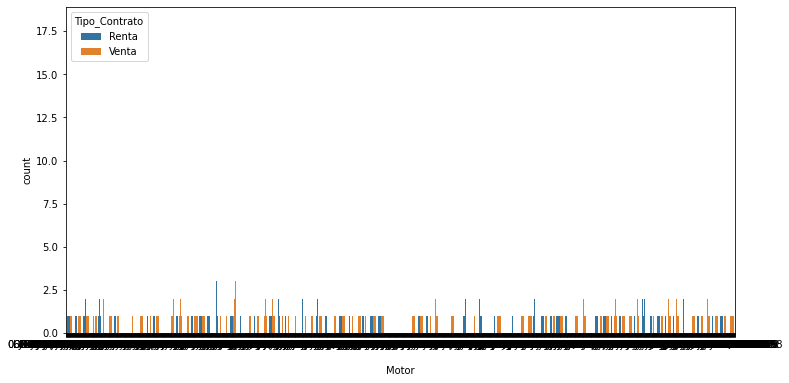

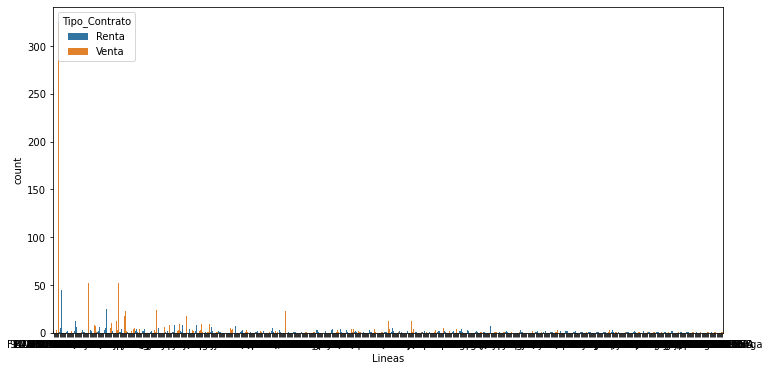

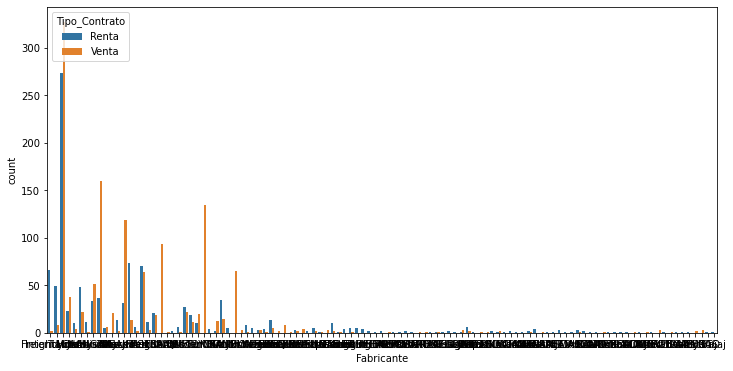

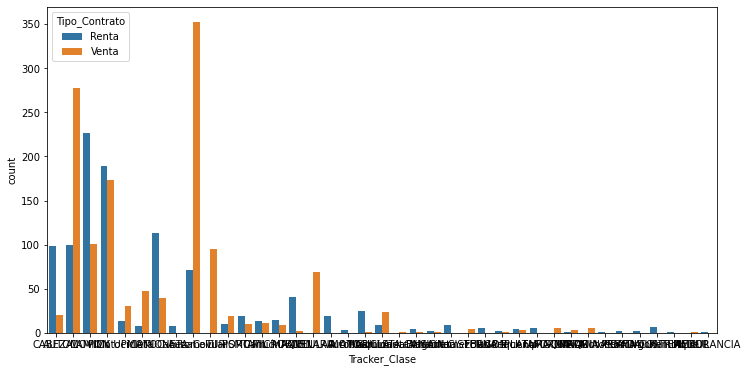

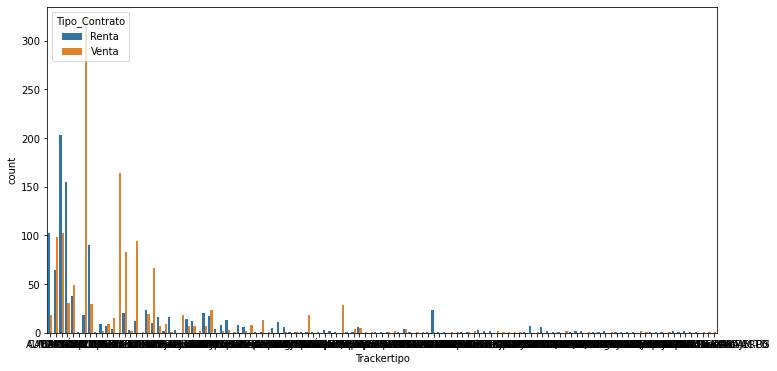

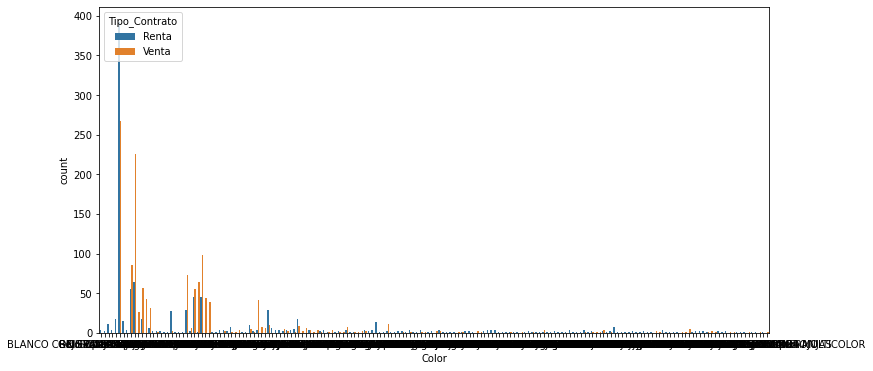

In [14]:
modulosP2.plotCategoricalVals(dataset, categoric_vars, y='Tipo_Contrato')

### Variables Cuantitativas

De las pocas variables cuantitavias ninguna es discreta, por lo que solo se graficarán las continuas.

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


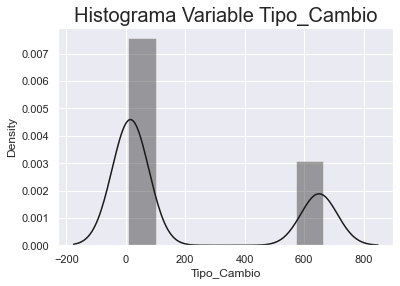

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


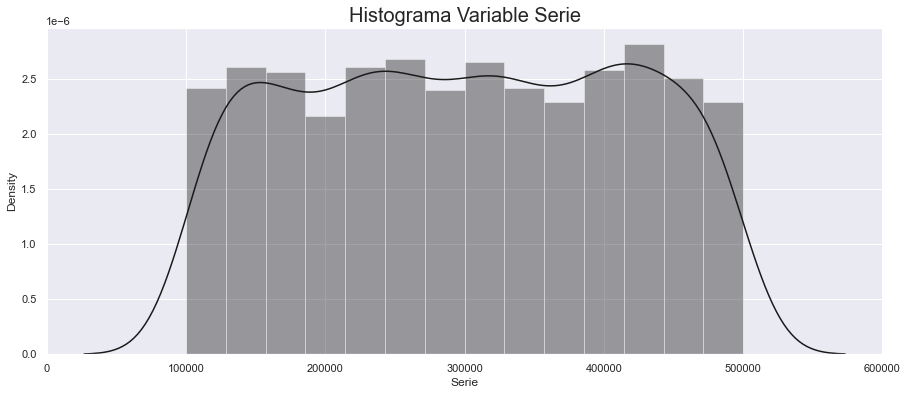

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


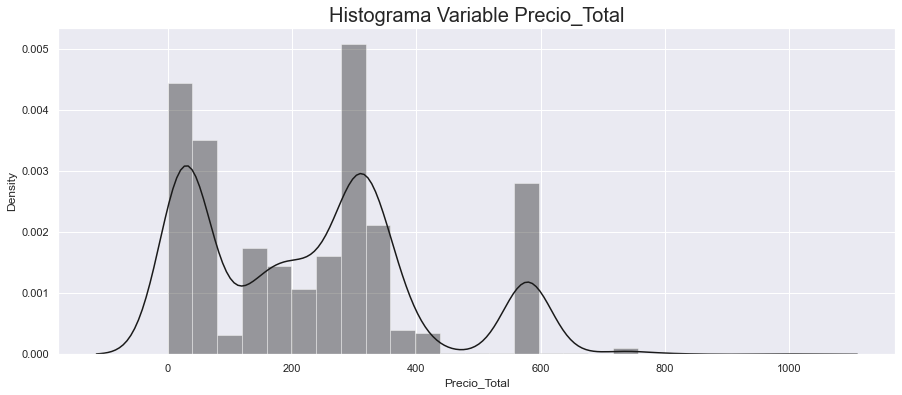

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


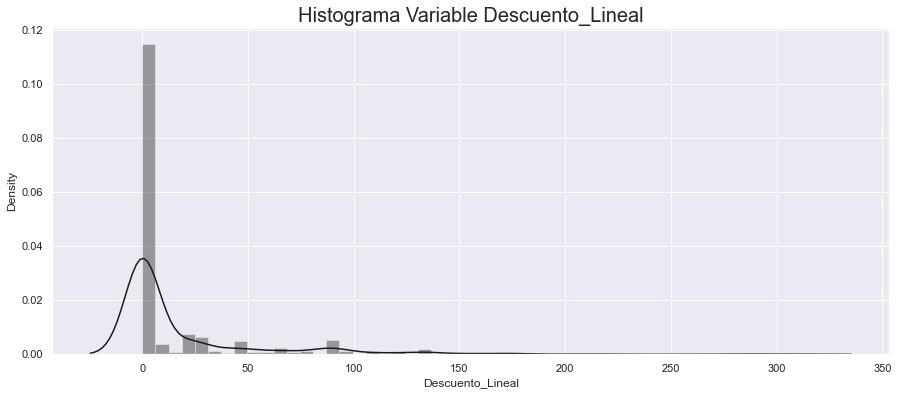

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


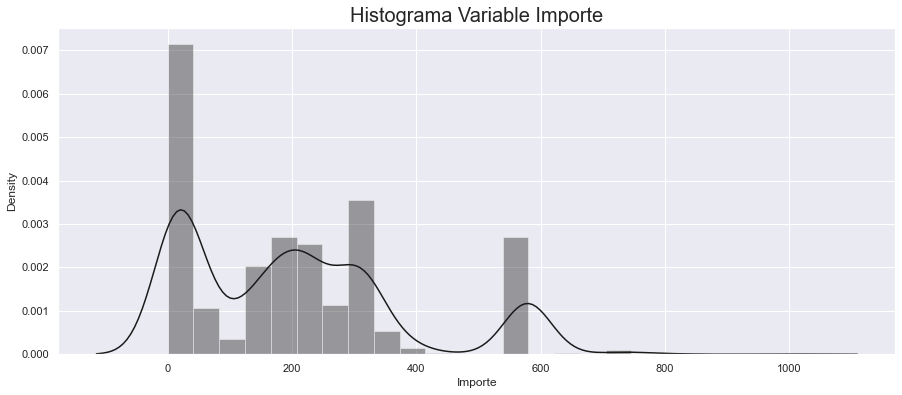

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


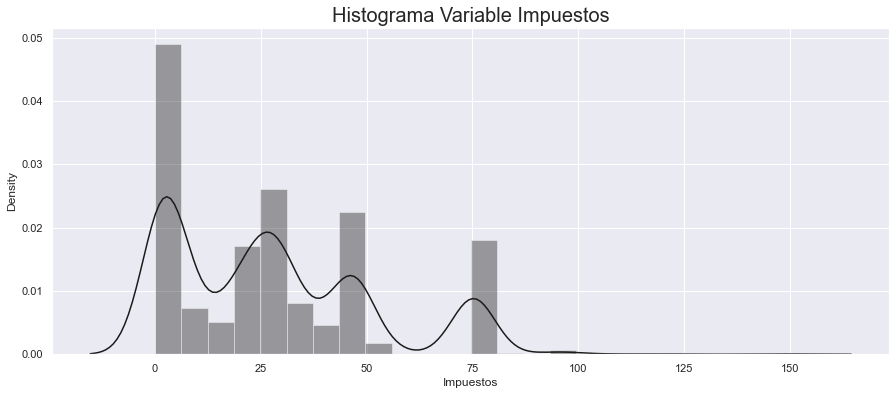

C:\Users\Ferickcen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


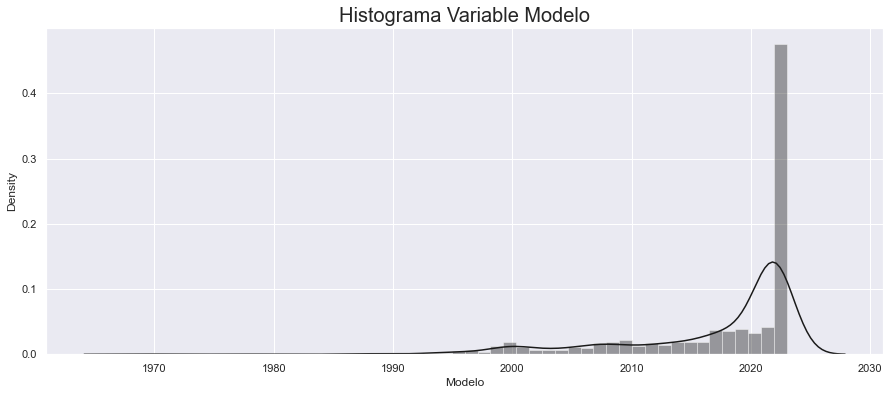

In [15]:
modulosP2.graphs(dataset, continues_vars)

### Resumen de la Exploración 

La mayoría de las variables son categóricas y pocas son cuantitavas.

En varias de las variables categóricas existe un mismo dato pero con variciones, como mayúsculas, minúsculas, tildes, espacios etc.

Las columna Precio y País son las únicas que contienen faltantes, pero la primera ya que casi toda está vacía, se eliminará del análisis.

La columna Cliente y Vehiculo son ID's de entidades dentro del sistema y las mismas serían en este caso redundantes pues el nombre, identificación y la placa, chasis identifican de manera única a estas entidades.

La columna cantidad se descarta porque toda está conformada solamente por 1

La columna almacén recurrente tiene el mismo dato que la columna almacen siendo redundante, también se descarta

La columna de fecha se también se elimina.